# Rule of Five applied to more complex distributions

In this Notebook, we will test the rule of Five against more complex distribution and real world dataset.

In [179]:
# Import required libraries
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt

In [180]:
# Create a random number generator with a fixed seed for reproducibility.
SEED = 12280752840384100672342137672332424409
rng = np.random.default_rng(SEED)

# Population size for generated datasets.
POPULATION_SIZE = 1_000_000

# Number of trial runs for the rule of five.
TRIAL_COUNT = 10_000

In [181]:
def rule_of_five(data: np.ndarray, median: float) -> bool:
    """
    Apply rule of five to a random sample. 
    
    Return True if the median is between the minimum and maximum of a random sample of 5 elements from the population. 
    Otherwise, return False.
    """

    sample = rng.choice(data, 5, replace=False)
    return sample.min() < median < sample.max()

def test_rule_of_five(population: list[float], trial_count: int = TRIAL_COUNT) -> list[bool]:
    """
    Test the rule of five with a population and a number of trials.

    Return a list of booleans indicating whether the rule of five is satisfied for each trial.
    """

    print(f"Testing the rule of five with {trial_count} trials (population size: {len(population):,}).")
    data = np.array(population)
    median = np.median(data)

    # Passing a `np.ndarray` to the function is order of magnitude faster than passing a `list`.
    # Internally `random.choice` converts the input to a `np.ndarray`.
    result = [rule_of_five(data, median) for _ in range(trial_count)]
    print(f"Rule of five success rate: {np.mean(result):.2%}")

    return result

In [212]:
def show_frequency_distribution(data: list[float], title: str, x_label: str) -> None:
    """Render plot with the frequency distribution of the population."""

    plt.hist(data, bins=30, edgecolor='black', alpha=0.7)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Frequency')

    median_value = np.median(data)
    plt.axvline(median_value, color='red', linestyle='--')
    plt.annotate('Median', (median_value, 0), textcoords="offset points", 
                xytext=(-8, 10), rotation=90, ha='center', color='red')

    plt.show()

def show_cumulative_mean(data: list[bool], title: str) -> None:
    """Render plot with the cumulative mean of the data."""

    # Calculate the cumulative mean of the data and insert a 0 at the beginning to ensure the plot 
    # always starts at 0 even if the first trial is successful.
    cumulative_probability = np.cumsum(data) / np.arange(1, len(data) + 1)
    cumulative_probability = np.insert(cumulative_probability, 0, 0)

    plt.plot(cumulative_probability)
    plt.ylim(0.75, 1)

    expected_value = 0.9375
    plt.axhline(expected_value, color='r', linestyle='--')
    plt.annotate(f'{expected_value:.2%}', (len(data), expected_value), textcoords="offset points", 
                 xytext=(-10, -10), ha='center', color='red')

    plt.title(title)
    plt.xlabel('Trials (n)')
    plt.ylabel('Mean value after n trials')

    plt.show()

## Normal distribution

In [213]:
normal = rng.standard_normal(POPULATION_SIZE)

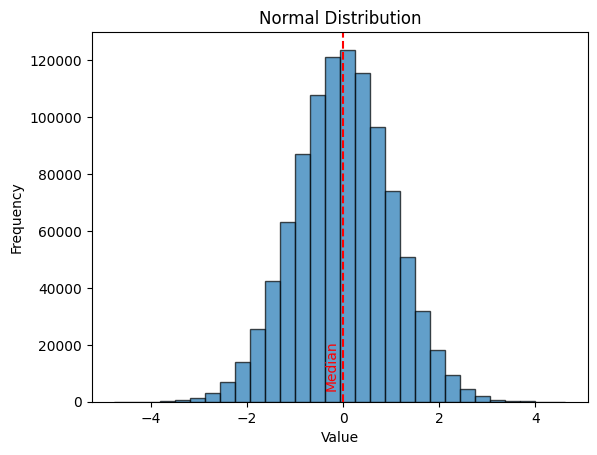

In [214]:
show_frequency_distribution(
    normal, 
    title='Normal Distribution', 
    x_label='Value',
)

In [215]:
trial_results = test_rule_of_five(normal.tolist())

Testing the rule of five with 10000 trials (population size: 1,000,000).
Rule of five success rate: 93.41%


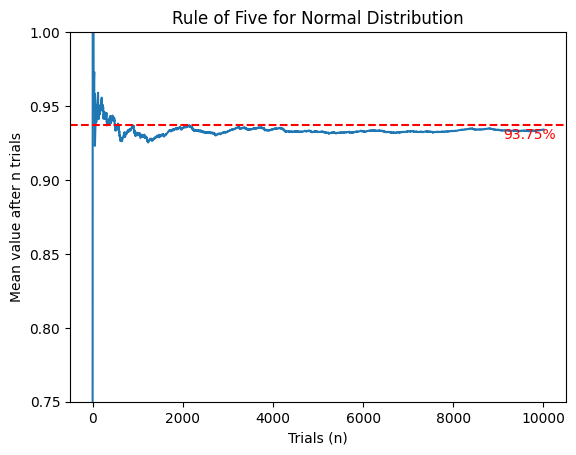

In [216]:
show_cumulative_mean(
    trial_results, 
    title='Rule of Five for Normal Distribution',
)

## Triangular Distribution

In [217]:
triangular = rng.triangular(0, 0.7, 1, POPULATION_SIZE)

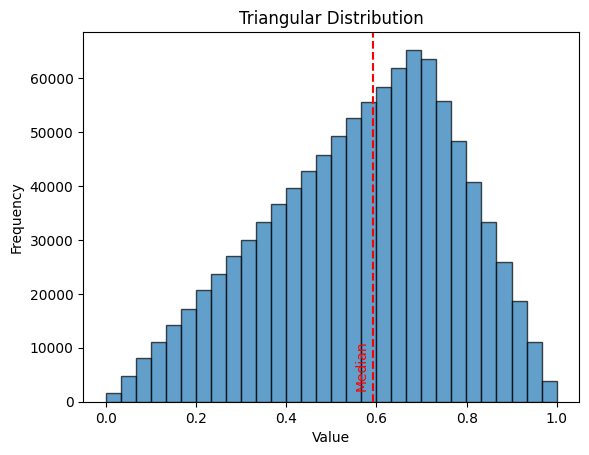

In [218]:
show_frequency_distribution(
    triangular, 
    title='Triangular Distribution', 
    x_label='Value',
)

In [219]:
trial_results = test_rule_of_five(triangular.tolist())

Testing the rule of five with 10000 trials (population size: 1,000,000).
Rule of five success rate: 94.17%


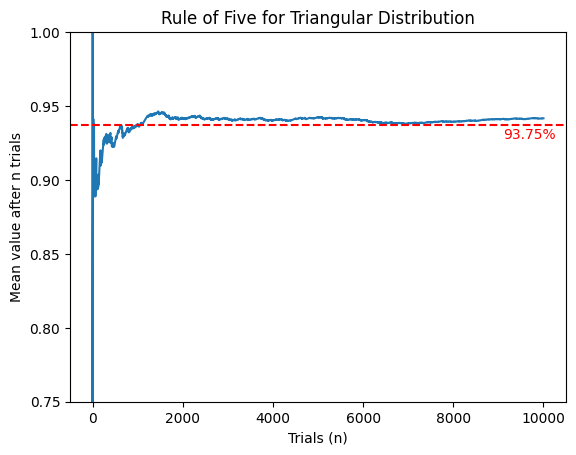

In [220]:
show_cumulative_mean(
    trial_results, 
    title='Rule of Five for Triangular Distribution',
)

## US Avocado price

In [221]:
dataset = 'https://www.kaggle.com/datasets/neuromusic/avocado-prices'
od.download(dataset, data_dir='./data')

Skipping, found downloaded files in "./data/avocado-prices" (use force=True to force download)


In [222]:
df = pd.read_csv('./data/avocado-prices/avocado.csv', index_col=0)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [223]:
# Get the avocado price for the entire US
avocado_price = df[df["region"] == "TotalUS"]['AveragePrice']
avocado_price.describe()

count    338.000000
mean       1.319024
std        0.295460
min        0.760000
25%        1.040000
50%        1.325000
75%        1.540000
max        2.090000
Name: AveragePrice, dtype: float64

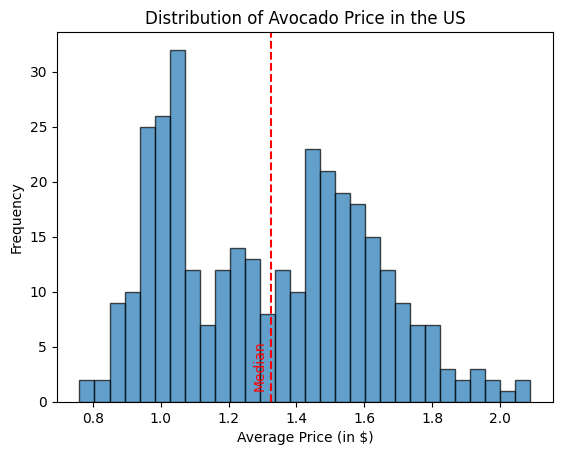

In [224]:
show_frequency_distribution(
    avocado_price, 
    title='Distribution of Avocado Price in the US', 
    x_label='Average Price (in $)'
)

In [225]:
trial_results = test_rule_of_five(avocado_price.to_list())

Testing the rule of five with 10000 trials (population size: 338).
Rule of five success rate: 93.91%


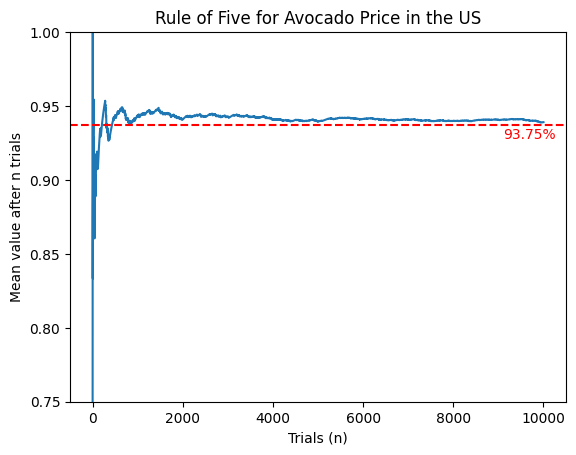

In [226]:
show_cumulative_mean(
    trial_results, 
    title='Rule of Five for Avocado Price in the US'
)

## Hourly Energy Consumption in Virginia

In [197]:
dataset = 'https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption'
od.download(dataset, data_dir='./data')

Skipping, found downloaded files in "./data/hourly-energy-consumption" (use force=True to force download)


In [198]:
df = pd.read_csv('./data/hourly-energy-consumption/DOM_hourly.csv')
df.head()

,Datetime,DOM_MW
0,2005-12-31 01:00:00,9389.0
1,2005-12-31 02:00:00,9070.0
2,2005-12-31 03:00:00,9001.0
3,2005-12-31 04:00:00,9042.0
4,2005-12-31 05:00:00,9132.0


In [199]:
energy_consumption = df['DOM_MW']
energy_consumption.describe()

count    116189.000000
mean      10949.203625
std        2413.946569
min        1253.000000
25%        9322.000000
50%       10501.000000
75%       12378.000000
max       21651.000000
Name: DOM_MW, dtype: float64

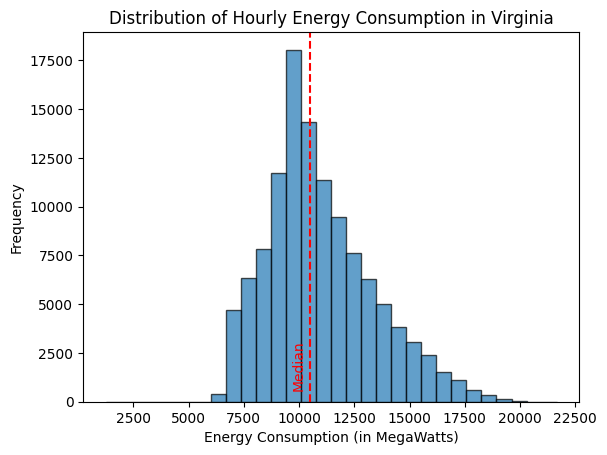

In [200]:
show_frequency_distribution(
    energy_consumption, 
    title='Distribution of Hourly Energy Consumption in Virginia', 
    x_label='Energy Consumption (in MegaWatts)'
)

In [201]:
trial_results = test_rule_of_five(energy_consumption.to_list())

Testing the rule of five with 10000 trials (population size: 116,189).
Rule of five success rate: 93.57%


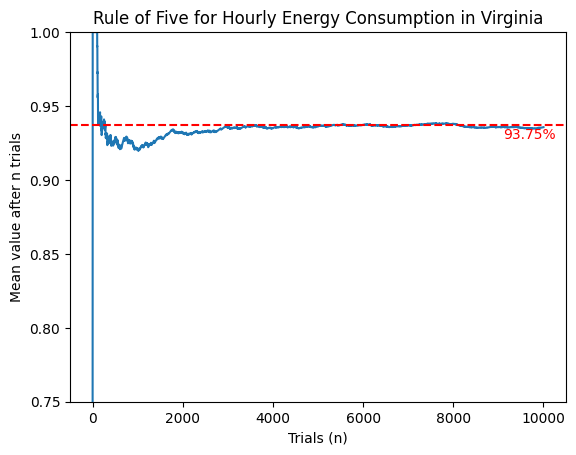

In [202]:
show_cumulative_mean(
    trial_results, 
    title='Rule of Five for Hourly Energy Consumption in Virginia'
)

## Fitbit Data

In [203]:
dataset = 'https://www.kaggle.com/datasets/arashnic/fitbit'
od.download(dataset, data_dir='./data')

Skipping, found downloaded files in "./data/fitbit" (use force=True to force download)


In [204]:
df = pd.read_csv('./data/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')
df.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [205]:
# Get heart rate data for the user with the most data points
id_with_most_data = df["Id"].value_counts().idxmax()
heart_rate = df[df["Id"] == id_with_most_data]["Value"]

heart_rate.describe()

count    285461.000000
mean         82.300577
std          15.911590
min          46.000000
25%          70.000000
50%          83.000000
75%          93.000000
max         191.000000
Name: Value, dtype: float64

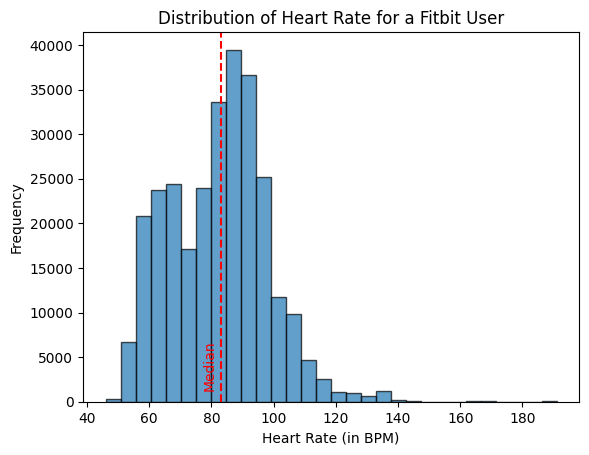

In [206]:
show_frequency_distribution(
    heart_rate, 
    title='Distribution of Heart Rate for a Fitbit User', 
    x_label='Heart Rate (in BPM)'
)

In [207]:
trial_results = test_rule_of_five(heart_rate.to_list())

Testing the rule of five with 10000 trials (population size: 285,461).
Rule of five success rate: 92.71%


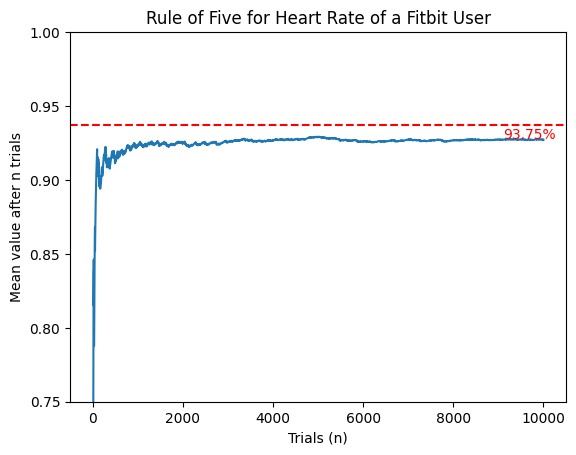

In [208]:
show_cumulative_mean(
    trial_results, 
    title='Rule of Five for Heart Rate of a Fitbit User'
)